In [1]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to preprocess images and extract RGB features
def extract_preprocessed_features(folder_path):
    features = []
    labels = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            
            # Preprocessing: Noise removal, grayscale conversion, BGR channel separation, BGR to GBR conversion
            preprocessed_img = preprocess_image(img)
            
            # Calculate average RGB values from preprocessed image
            avg_rgb = np.mean(preprocessed_img, axis=(0, 1))
            
            features.append(avg_rgb)
            labels.append(1 if folder_path.endswith("Mature Dragon Fruit") else 0)  # 1 for mature, 0 for immature
    
    return np.array(features), np.array(labels)

# Function to preprocess an image
def preprocess_image(img):
    # Noise removal (Gaussian blur)
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)
    
    # Grayscale conversion
    gray_img = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)
    
    # BGR channel separation
    b, g, r = cv2.split(img_blur)
    
    # BGR to GBR conversion
    gbr_img = cv2.merge([g, b, r])
    
    return gbr_img  # Return the preprocessed image

# Load dataset, preprocess images, and extract features
mature_folder = "C://Users//chait//Desktop//Dragon Fruit Maturity Detection Dataset//Dragon Fruit Maturity Detection Dataset//Augmented Dataset//Mature Dragon Fruit"
immature_folder = "C://Users//chait//Desktop//Dragon Fruit Maturity Detection Dataset//Dragon Fruit Maturity Detection Dataset//Augmented Dataset//Immature Dragon Fruit"

mature_features, mature_labels = extract_preprocessed_features(mature_folder)
immature_features, immature_labels = extract_preprocessed_features(immature_folder)

# Combine features and labels
features = np.vstack((mature_features, immature_features))
labels = np.hstack((mature_labels, immature_labels))

# Calculate average RGB values (features)
avg_red = np.mean(features[:, 0])
avg_green = np.mean(features[:, 1])
avg_blue = np.mean(features[:, 2])

# Print average RGB values
print(f"Average Red: {avg_red:.2f}")
print(f"Average Green: {avg_green:.2f}")
print(f"Average Blue: {avg_blue:.2f}")

# Step 2: Apply K-means Clustering
# Normalize features
features_norm = features / 255.0  # Scale RGB values to [0, 1]

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(features_norm)

# Step 3: Apply SVM for Classification
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_norm, labels, test_size=0.2, random_state=42)

# Print unique class labels in training set (debugging)
print("Unique Class Labels in Training Set:", np.unique(y_train))

# Train SVM classifier
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict using the trained SVM model
y_train_pred = svm_classifier.predict(X_train)
y_test_pred = svm_classifier.predict(X_test)

# Calculate accuracy for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate accuracy for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


Average Red: 137.78
Average Green: 99.82
Average Blue: 125.02


C:\Users\chait\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Unique Class Labels in Training Set: [0 1]
Training Accuracy: 0.9993
Test Accuracy: 0.9970


Precision: 1.0000
Recall: 0.9927


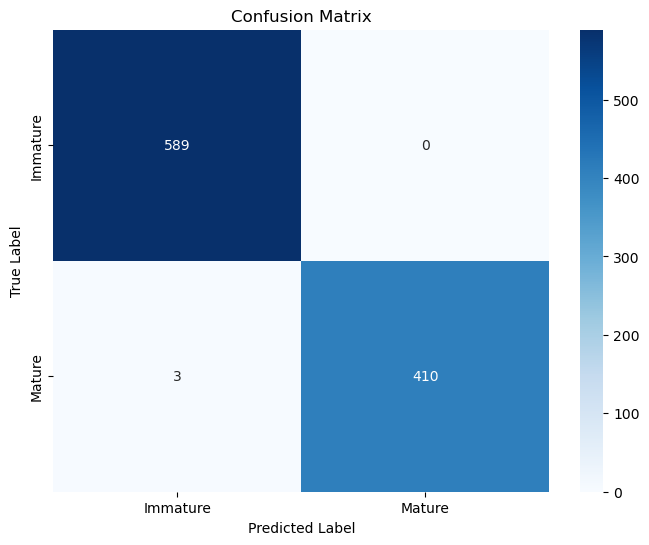

In [2]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate precision and recall for test set
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
labels = ['Immature', 'Mature']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


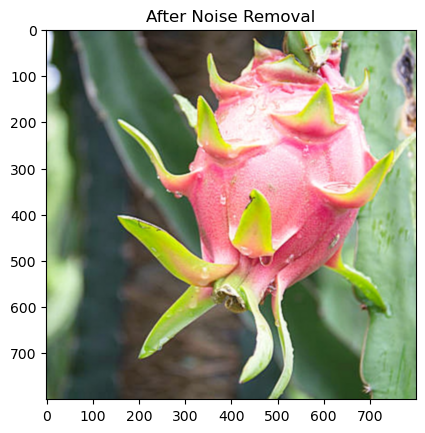

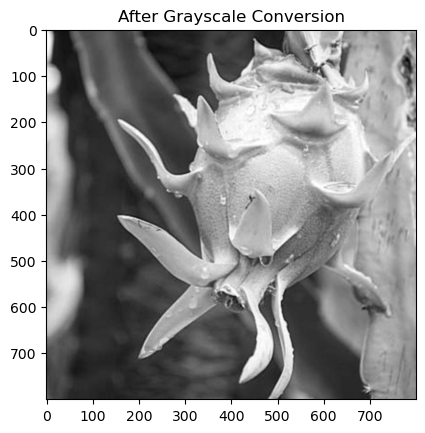

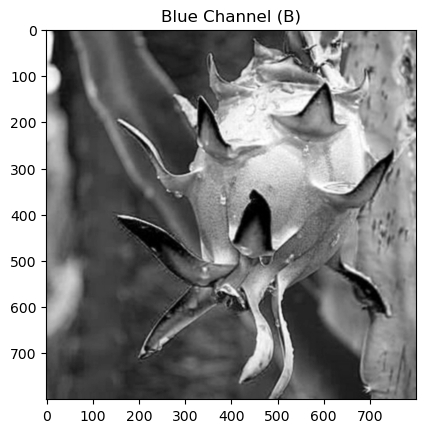

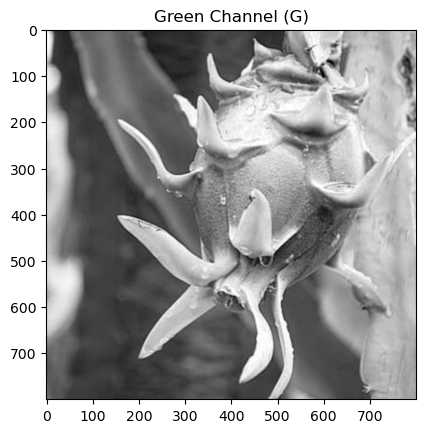

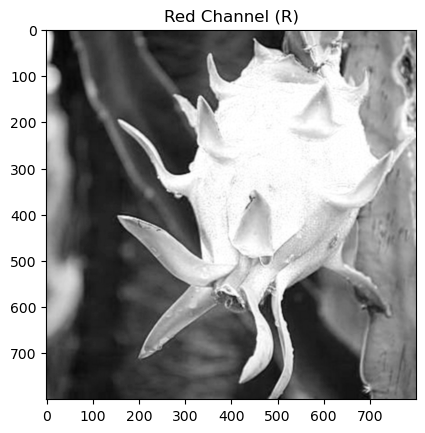

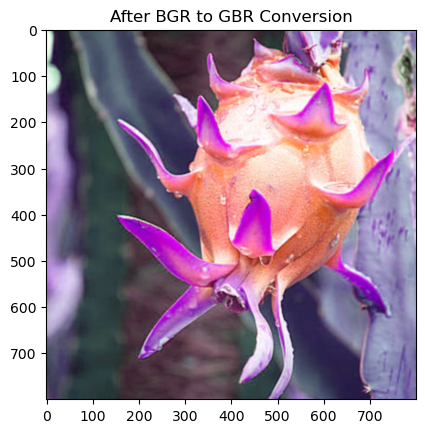

In [ ]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Function to preprocess an image and display intermediate results
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    
    # Step 1: Noise removal (Gaussian blur)
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)
    plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
    plt.title('After Noise Removal')
    plt.show()
    
    # Step 2: Grayscale conversion
    gray_img = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_img, cmap='gray')
    plt.title('After Grayscale Conversion')
    plt.show()
    
    # Step 3: BGR channel separation
    b, g, r = cv2.split(img_blur)
    plt.imshow(b, cmap='gray')
    plt.title('Blue Channel (B)')
    plt.show()
    plt.imshow(g, cmap='gray')
    plt.title('Green Channel (G)')
    plt.show()
    plt.imshow(r, cmap='gray')
    plt.title('Red Channel (R)')
    plt.show()
    
    # Step 4: BGR to GBR conversion
    gbr_img = cv2.merge([g, b, r])
    plt.imshow(cv2.cvtColor(gbr_img, cv2.COLOR_BGR2RGB))
    plt.title('After BGR to GBR Conversion')
    plt.show()

# Example usage: Preprocess a single image and display intermediate results
image_path = r"C:\Users\chait\Desktop\Dragon Fruit Maturity Detection Dataset\Dragon Fruit Maturity Detection Dataset\Original Dataset\Mature Dragon Fruit\Mature_Dragon_Original_Data0029.jpg"
preprocess_image(image_path)
